In [2]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load best model
best_model = joblib.load("../models/best_model.pkl")
print("✅ Best model loaded:", type(best_model).__name__)

# Load scaler, target encoder, and feature names
scaler = joblib.load("../models/scaler.pkl")
target_encoder = joblib.load("../models/target_encoder.pkl")
feature_names = joblib.load("../models/feature_names.pkl")
print("✅ Preprocessing objects loaded\n")

# Load dataset
df = pd.read_csv("../data/placementdata.csv")


✅ Best model loaded: LogisticRegression
✅ Preprocessing objects loaded



In [3]:
# Encode categorical columns using saved label encoders
label_encoders = joblib.load("../models/label_encoders.pkl")
for col, le in label_encoders.items():
    df[col + "_encoded"] = le.transform(df[col])

# Encode target
df["status_encoded"] = target_encoder.transform(df["PlacementStatus"])

# Features & target
X = df[feature_names]
y = df["status_encoded"]

# Scale features
X_scaled = scaler.transform(X)


In [4]:
# Predict
y_pred = best_model.predict(X_scaled)

# Probabilities (for ROC curve)
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_scaled)[:,1]  # probability for positive class
else:  # For SVM with probability=True
    y_proba = best_model.decision_function(X_scaled)


Confusion Matrix:
 [[4791 1012]
 [ 988 3209]]


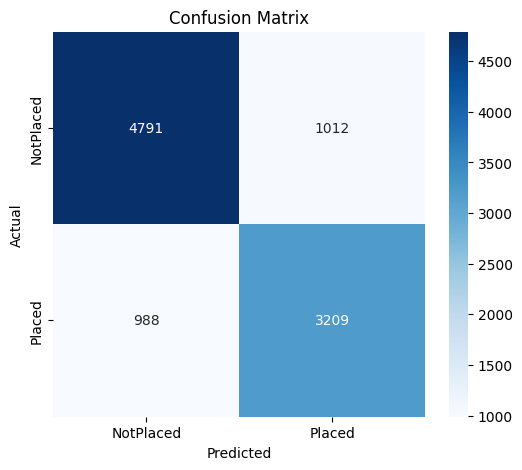

In [5]:
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [6]:
print("Classification Report:")
print(classification_report(y, y_pred, target_names=target_encoder.classes_, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

   NotPlaced       0.83      0.83      0.83      5803
      Placed       0.76      0.76      0.76      4197

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.80      0.80      0.80     10000



AUC Score: 0.8787


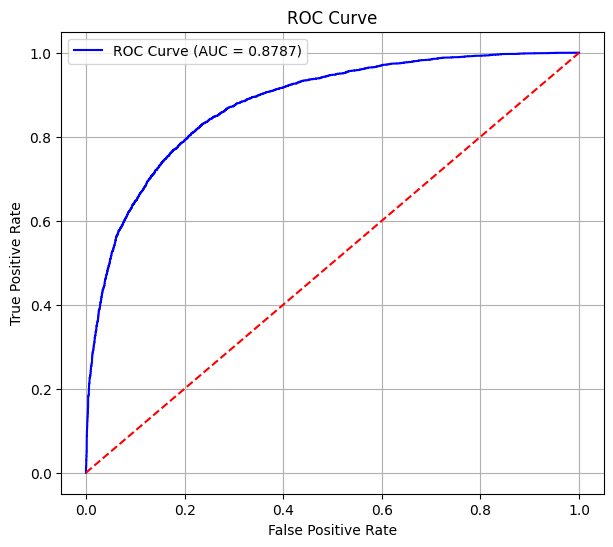

In [7]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_proba)
auc_score = roc_auc_score(y, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


📌 Step 1: Libraries imported successfully!

✅ Best model loaded: LogisticRegression
✅ Preprocessing objects loaded: scaler, target encoder, feature names, label encoders

✅ Dataset loaded with shape: (10000, 12)
Columns: ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus'] 

📌 Step 4: Encoding categorical columns...
✅ Preprocessing done! Features scaled and target encoded

📌 Step 5: Making predictions...
✅ Predictions done!

📌 Step 6: Confusion Matrix

Confusion Matrix:
 [[4791 1012]
 [ 988 3209]] 



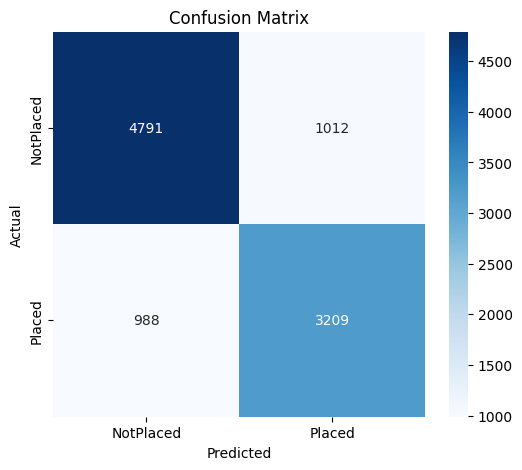

📌 Step 7: Classification Report

              precision    recall  f1-score   support

   NotPlaced       0.83      0.83      0.83      5803
      Placed       0.76      0.76      0.76      4197

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.80      0.80      0.80     10000

📌 Step 8: ROC Curve and AUC Score

AUC Score: 0.8787



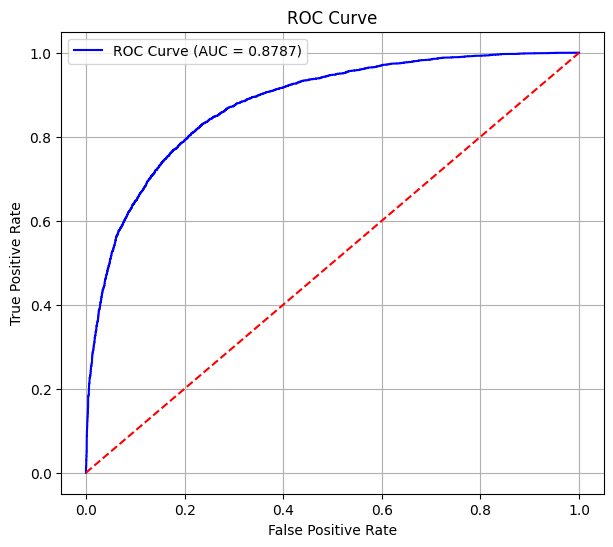

🎉 Evaluation Complete! You now have:
- Confusion Matrix (errors vs correct)
- Classification Report (precision, recall, F1)
- ROC Curve + AUC (model's ability to separate classes)


In [8]:
#### ALL IN ONE


# 04_evaluation.ipynb

# -------------------------------
# 1️⃣ Import libraries
# -------------------------------
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("📌 Step 1: Libraries imported successfully!\n")

# -------------------------------
# 2️⃣ Load best model + preprocessors
# -------------------------------
best_model = joblib.load("../models/best_model.pkl")
print("✅ Best model loaded:", type(best_model).__name__)

scaler = joblib.load("../models/scaler.pkl")
target_encoder = joblib.load("../models/target_encoder.pkl")
feature_names = joblib.load("../models/feature_names.pkl")
label_encoders = joblib.load("../models/label_encoders.pkl")

print("✅ Preprocessing objects loaded: scaler, target encoder, feature names, label encoders\n")

# -------------------------------
# 3️⃣ Load dataset
# -------------------------------
df = pd.read_csv("../data/placementdata.csv")
print("✅ Dataset loaded with shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")

# -------------------------------
# 4️⃣ Apply same preprocessing
# -------------------------------
print("📌 Step 4: Encoding categorical columns...")

for col, le in label_encoders.items():
    df[col + "_encoded"] = le.transform(df[col])

df["status_encoded"] = target_encoder.transform(df["PlacementStatus"])

X = df[feature_names]
y = df["status_encoded"]

X_scaled = scaler.transform(X)
print("✅ Preprocessing done! Features scaled and target encoded\n")

# -------------------------------
# 5️⃣ Predictions
# -------------------------------
print("📌 Step 5: Making predictions...")
y_pred = best_model.predict(X_scaled)

# Probabilities (needed for ROC curve)
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_scaled)[:, 1]
else:
    y_proba = best_model.decision_function(X_scaled)

print("✅ Predictions done!\n")

# -------------------------------
# 6️⃣ Confusion Matrix
# -------------------------------
print("📌 Step 6: Confusion Matrix\n")
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm, "\n")

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# 7️⃣ Classification Report
# -------------------------------
print("📌 Step 7: Classification Report\n")
print(classification_report(y, y_pred, target_names=target_encoder.classes_, zero_division=0))

# -------------------------------
# 8️⃣ ROC Curve & AUC
# -------------------------------
print("📌 Step 8: ROC Curve and AUC Score\n")
fpr, tpr, thresholds = roc_curve(y, y_proba)
auc_score = roc_auc_score(y, y_proba)
print(f"AUC Score: {auc_score:.4f}\n")

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print("🎉 Evaluation Complete! You now have:")
print("- Confusion Matrix (errors vs correct)")
print("- Classification Report (precision, recall, F1)")
print("- ROC Curve + AUC (model's ability to separate classes)")
